In [60]:
import csv
import re
import json

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [66]:
rawprobs = """                       Rd2   Swt16  Elite8 Final4 Final  Champ
 1S  Houston           96.2   76.8   54.4   41.2   26.8   16.4   
 1E  Connecticut       98.2   81.0   52.7   36.5   25.8   16.3   
 1MW Purdue            98.2   77.4   56.9   36.8   21.5   12.0   
 4E  Auburn            88.1   66.9   32.8   20.6   13.2    7.4   
 2W  Arizona           96.4   70.1   46.4   28.6   13.4    6.8   
 2MW Tennessee         95.6   67.5   43.6   23.1   11.9    5.7   
 2E  Iowa St.          92.8   69.6   43.2   19.2   11.3    5.7   
 1W  North Carolina    98.1   62.3   38.2   20.6    8.7    4.0   
 4S  Duke              84.9   55.5   23.7   14.7    7.3    3.3   
 3MW Creighton         86.5   61.0   30.8   14.5    6.6    2.8   
 2S  Marquette         91.0   56.6   34.7   13.9    6.2    2.5   
 3E  Illinois          86.9   55.0   28.4   10.8    5.6    2.5   
 3W  Baylor            88.3   53.2   24.6   12.5    4.7    1.9   
 4W  Alabama           84.1   52.0   25.8   12.5    4.6    1.9   
 5MW Gonzaga           70.2   43.4   16.9    8.0    3.3    1.3   
 3S  Kentucky          86.7   51.0   24.9    8.3    3.2    1.1   
 6E  BYU               76.3   36.4   16.3    5.1    2.3    0.9   
 5S  Wisconsin         68.0   31.1   10.5    5.4    2.2    0.8   
 5W  Saint Mary's      63.5   31.0   13.6    5.8    1.9    0.7   
 4MW Kansas            73.4   37.0   12.4    5.2    1.9    0.6   
 9W  Michigan St.      54.8   21.9   10.9    4.6    1.5    0.6   
 6S  Texas Tech        63.1   32.2   14.6    4.6    1.6    0.5   
 5E  San Diego St.     79.2   26.6    8.1    3.3    1.4    0.5   
11W  New Mexico        55.1   25.8    9.7    4.0    1.2    0.4   
 7MW Texas             58.1   20.0    9.4    3.3    1.2    0.4   
 7S  Florida           51.7   22.0   11.0    3.3    1.1    0.3   
 8S  Nebraska          55.0   13.1    5.4    2.5    0.9    0.3   
 8W  Mississippi St.   45.2   15.8    7.1    2.7    0.8    0.2   
 7W  Dayton            51.1   15.4    6.7    2.6    0.7    0.2   
 9MW TCU               55.4   13.3    6.2    2.3    0.7    0.2   
10S  Colorado          27.9   12.2    6.2    1.9    0.7    0.2   
 6W  Clemson           44.9   19.1    6.5    2.5    0.6    0.2   
10W  Nevada            48.9   14.0    5.9    2.2    0.6    0.2   
 6MW South Carolina    53.7   19.8    6.4    1.9    0.5    0.1   
 7E  Washington St.    53.5   16.3    6.1    1.4    0.5    0.1   
 9S  Texas A&M         45.0    9.5    3.5    1.4    0.4    0.1   
10MW Colorado St.      27.3    8.4    3.7    1.2    0.4    0.1   
 9E  Northwestern      49.3    9.4    2.8    0.9    0.3    0.08  
 8E  Florida Atlantic  50.7    9.3    2.8    0.9    0.3    0.08  
10S  Boise St.         20.4    7.9    3.6    1.0    0.3    0.08  
 8MW Utah St.          44.6    9.1    3.7    1.2    0.3    0.08  
11MW Oregon            46.3   15.2    4.3    1.1    0.3    0.06  
10E  Drake             46.5   12.5    4.2    0.8    0.2    0.06  
12W  Grand Canyon      36.5   12.6    3.7    1.1    0.2    0.05  
11S  N.C. State        36.9   14.0    4.5    1.0    0.2    0.05  
12MW McNeese St.       29.8   12.2    2.7    0.8    0.2    0.04  
12S  James Madison     32.0    9.3    1.8    0.6    0.1    0.03  
10MW Virginia          14.7    3.5    1.2    0.3    0.08   0.02  
13MW Samford           26.6    7.4    1.2    0.2    0.04   0.007 
11E  Duquesne          23.7    5.6    1.2    0.2    0.03   0.005 
13E  Yale              11.9    4.0    0.6    0.1    0.02   0.005 
13S  Vermont           15.1    4.1    0.5    0.1    0.02   0.003 
13W  Charleston        15.9    4.4    0.8    0.1    0.01   0.002 
12E  UAB               20.8    2.5    0.3    0.04   0.006  0.001 
14MW Akron             13.5    4.0    0.6    0.07   0.009  <.001 
14E  Morehead St.      13.1    3.0    0.5    0.04   0.006  <.001 
14S  Oakland           13.3    2.8    0.4    0.03   0.004  <.001 
14W  Colgate           11.7    1.9    0.2    0.02   0.002  <.001  
15S  Western Kentucky   9.0    1.4    0.2    0.02   0.002  <.001 
15E  South Dakota St.   7.2    1.6    0.2    0.01   0.002  <.001 
16S  Longwood           3.8    0.6    0.07   0.009  <.001  <.001
15W  Long Beach St.     3.6    0.5    0.06   0.005  <.001  <.001 
15MW Saint Peter's      4.4    0.6    0.07   0.004  <.001  <.001 
16MW Montana St.        1.2    0.1    0.01   <.001  <.001  <.001 
16E  Stetson            1.8    0.2    0.01   <.001  <.001  <.001 
16MW Grambling St.      0.6    0.04   0.002  <.001  <.001  <.001 
16W  Howard             1.0    0.05   0.002  <.001  <.001  <.001 
16W  Wagner             0.9    0.05   0.002  <.001  <.001  <.001
"""

In [97]:
probs = []
for line in rawprobs.split("\n")[1:]:
    if not line: continue
    line = line.strip()
    sr = line[:4].strip()
    seed, region = re.split(r'(\d+)', sr)[1:]
    team = line[4:20].strip()
    prob = float(re.findall(r"\d+\.\d+", line)[0])
    probs.append((int(seed), region, team, float(prob)/100))
frprobs = {p[2]: p[3] for p in probs}
frprobs

{'Houston': 0.9620000000000001,
 'Connecticut': 0.982,
 'Purdue': 0.982,
 'Auburn': 0.8809999999999999,
 'Arizona': 0.9640000000000001,
 'Tennessee': 0.956,
 'Iowa St.': 0.9279999999999999,
 'North Carolina': 0.981,
 'Duke': 0.8490000000000001,
 'Creighton': 0.865,
 'Marquette': 0.91,
 'Illinois': 0.8690000000000001,
 'Baylor': 0.883,
 'Alabama': 0.841,
 'Gonzaga': 0.7020000000000001,
 'Kentucky': 0.867,
 'BYU': 0.763,
 'Wisconsin': 0.68,
 "Saint Mary's": 0.635,
 'Kansas': 0.7340000000000001,
 'Michigan St.': 0.5479999999999999,
 'Texas Tech': 0.631,
 'San Diego St.': 0.792,
 'New Mexico': 0.551,
 'Texas': 0.581,
 'Florida': 0.517,
 'Nebraska': 0.55,
 'Mississippi St.': 0.452,
 'Dayton': 0.511,
 'TCU': 0.5539999999999999,
 'Colorado': 0.27899999999999997,
 'Clemson': 0.449,
 'Nevada': 0.489,
 'South Carolina': 0.537,
 'Washington St.': 0.535,
 'Texas A&M': 0.45,
 'Colorado St.': 0.273,
 'Northwestern': 0.493,
 'Florida Atlantic': 0.507,
 'Boise St.': 0.204,
 'Utah St.': 0.446,
 'Oregon

In [98]:
bracket = json.load(open("bracket24.json"))
rd1 = [(bracket[region][str(seed)], bracket[region][str(17-seed)]) for seed in range(1,9) for region in ['east', 'south', 'midwest', 'west']]
rd1, len(rd1)

([('Connecticut', 'Stetson'),
  ('Houston', 'Longwood'),
  ('Purdue', 'Grambling St.'),
  ('North Carolina', 'Howard'),
  ('Iowa St.', 'South Dakota St.'),
  ('Marquette', 'Western Kentucky'),
  ('Tennessee', "Saint Peter's"),
  ('Arizona', 'Long Beach St.'),
  ('Illinois', 'Morehead St.'),
  ('Kentucky', 'Oakland'),
  ('Creighton', 'Akron'),
  ('Baylor', 'Colgate'),
  ('Auburn', 'Yale'),
  ('Duke', 'Vermont'),
  ('Kansas', 'Samford'),
  ('Alabama', 'Charleston'),
  ('San Diego St.', 'UAB'),
  ('Wisconsin', 'James Madison'),
  ('Gonzaga', 'McNeese St.'),
  ("Saint Mary's", 'Grand Canyon'),
  ('BYU', 'Duquesne'),
  ('Texas Tech', 'N.C. State'),
  ('South Carolina', 'Oregon'),
  ('Clemson', 'New Mexico'),
  ('Washington St.', 'Drake'),
  ('Florida', 'Colorado'),
  ('Texas', 'Colorado St.'),
  ('Dayton', 'Nevada'),
  ('Florida Atlantic', 'Northwestern'),
  ('Nebraska', 'Texas A&M'),
  ('Utah St.', 'TCU'),
  ('Mississippi St.', 'Michigan St.')],
 32)

In [99]:
kenpom = {t['TeamName']: t for t in list(csv.DictReader(open("kenpom_2024.csv")))}
data = [(a, b, float(kenpom[a]['AdjEM']) - float(kenpom[b]['AdjEM']), frprobs[a]) for a, b in rd1]
data

[('Connecticut', 'Stetson', 36.31724, 0.982),
 ('Houston', 'Longwood', 30.762552000000003, 0.9620000000000001),
 ('Purdue', 'Grambling St.', 36.92451, 0.982),
 ('North Carolina', 'Howard', 32.894999999999996, 0.981),
 ('Iowa St.', 'South Dakota St.', 23.74509, 0.9279999999999999),
 ('Marquette', 'Western Kentucky', 19.67689, 0.91),
 ('Tennessee', "Saint Peter's", 28.295650000000002, 0.956),
 ('Arizona', 'Long Beach St.', 26.63322527, 0.9640000000000001),
 ('Illinois', 'Morehead St.', 18.3083, 0.8690000000000001),
 ('Kentucky', 'Oakland', 17.224829999999997, 0.867),
 ('Creighton', 'Akron', 18.470119999999998, 0.865),
 ('Baylor', 'Colgate', 20.15478, 0.883),
 ('Auburn', 'Yale', 18.52718, 0.8809999999999999),
 ('Duke', 'Vermont', 17.91182, 0.8490000000000001),
 ('Kansas', 'Samford', 9.443290000000001, 0.7340000000000001),
 ('Alabama', 'Charleston', 14.90453, 0.841),
 ('San Diego St.', 'UAB', 13.84658, 0.792),
 ('Wisconsin', 'James Madison', 7.885699999999998, 0.68),
 ('Gonzaga', 'McNeese 

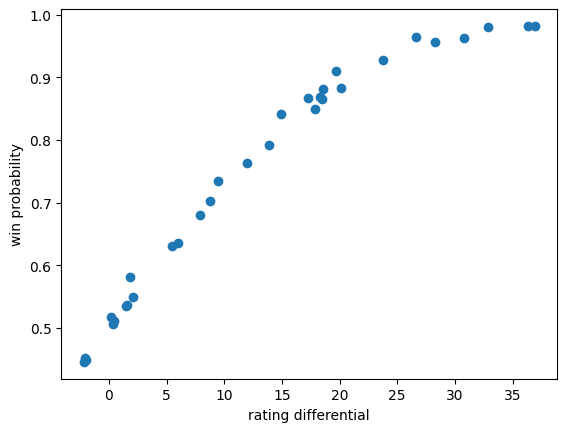

In [100]:
diffs = [x[2] for x in data]
winProb = [x[3] for x in data]
plt.xlabel('rating differential')
plt.ylabel('win probability')
plt.scatter(diffs, winProb)

In [101]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# the function to fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [102]:
popt, pcov = curve_fit(func, diffs, winProb)

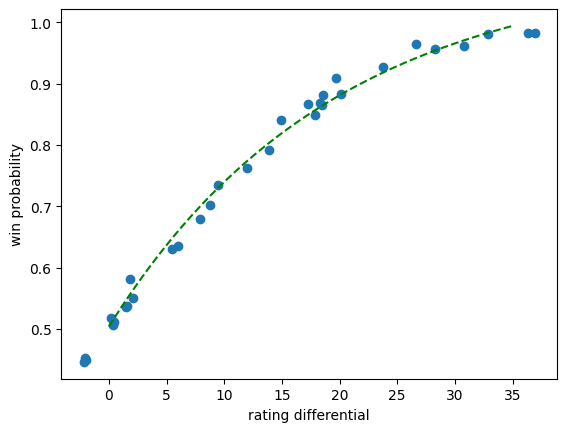

In [103]:
plt.scatter(diffs, winProb)
xvals = np.linspace(0, 35, 100)
plt.plot(xvals, func(xvals, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('rating differential')
plt.ylabel('win probability')
plt.show()

In [104]:
popt

array([-0.58845638,  0.05128214,  1.09208311])

- two years ago: `array([-0.66888151,  0.04322173,  1.16116838])`
- last year: `array([-6.80512162e+01,  3.96407147e-02,  1.18560240e+02])`

```
-0.5885 * exp(rating_differential * -0.0513) + 1.092
```